In [1]:
!pip install pandas
import numpy as np
import pandas as pd
import t2_utils as t2
from ast import literal_eval
import matplotlib.pyplot as plt

You should consider upgrading via the 'c:\users\richard\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


In [8]:
# change the file path here
file_path_base = r"C:\Users\Richard\Desktop\JKU\1.Semester-WS2023\MultimediaSearchAndRetrieval\\"
file_path_info = file_path_base + "id_information_mmsr.tsv" 
file_path_word2vec = file_path_base + "id_lyrics_word2vec_mmsr.tsv"
file_path_tfidf = file_path_base + "id_lyrics_tf-idf_mmsr.tsv"
file_path_bert = file_path_base + "id_lyrics_bert_mmsr.tsv"

file_path_genre = file_path_base + "id_genres_mmsr.tsv"
file_path_musicnn = file_path_base + "id_musicnn_mmsr.tsv"
file_path_mfcc_bow = file_path_base + "id_mfcc_bow_mmsr.tsv"
file_path_ivec_256 = file_path_base + "id_ivec256_mmsr.tsv"
file_path_logfluc = file_path_base + "id_blf_logfluc_mmsr.tsv"

df_info = pd.read_table(file_path_info)
df_word2vec = pd.read_table(file_path_word2vec)
df_tfidf = pd.read_table(file_path_tfidf)
df_bert = pd.read_table(file_path_bert)

df_genre = pd.read_table(file_path_genre)
df_musicnn = pd.read_table(file_path_musicnn)
df_mfcc_bow = pd.read_table(file_path_mfcc_bow)
df_ivec_256 = pd.read_table(file_path_ivec_256)
df_logfluc = pd.read_table(file_path_logfluc)

df_genre["genre"] = df_genre["genre"].apply(literal_eval) # convert string into array
df_song_data = pd.merge(df_info, df_genre, on='id')
df_song_data

,id,artist,song,album_name,genre
0,01Yfj2T3YTwJ1Yfy,We As Human,Take The Bullets Away (feat. Lacey Sturm),We As Human,"[rock, christian rock]"
1,01gyRHLquwXDlhkO,The Notorious B.I.G.,Somebody's Gotta Die,Life After Death (Remastered Edition),"[hip hop, rap, grindcore, death metal]"
2,01rMxQv6vhyE1oQX,Against the Current,Chasing Ghosts,In Our Bones,"[rock, pop punk]"
3,02RGE9FNH65RtMS7,Barthezz,Infected,Trance - The Early Years (1997-2002),"[trance, techno, progressive trance]"
4,02ZnlCGZEbkfCDxo,Laura Pausini,Tra Te E Il Mare,The Best of Laura Pausini - E Ritorno Da Te,"[pop, italian pop, latin, europop, ambient, po..."
...,...,...,...,...,...
10089,zyzILCQvVeUFIINi,Crowded House,When You Come,Temple Of Low Men,"[rock, pop, indie rock, folk rock, new wave, m..."
10090,zzgS4ZqyswamEWNj,Britney Spears,My Only Wish (This Year),Platinum Christmas,"[pop, rock, teen pop, soundtrack, singer songw..."
10091,zzoFYDMlqU1X2zz1,Thundercat,DUI,Drunk,"[jazz, jazz fusion]"
10092,zzpkRCGA5ud8q4mv,Otis Redding,Rock Me Baby,Otis Blue,"[soul, blues, r b, blues rock, southern soul, ..."


In [10]:
df_song_data[df_song_data["genre"].isin(['rock', 'christian rock'])]

,id,artist,song,album_name,genre


In [24]:
li = [1,2,3,4,5]
li[0:5]

[1, 2, 3, 4, 5]

In [71]:
def calculate_precision(artist: str, title: str, result_list: pd.DataFrame, k: int) -> float:
    query_id = df_info[(df_info["artist"] == artist) & (df_info["song"] == title)]["id"].values[0] # search for query song in info
    query_genres = df_genre[df_genre["id"] == query_id] # get genres of query
    result_list = pd.merge(result_list, df_genre, on='id', how='left')
    songs_with_common_genre = result_list[result_list['genre'].apply(lambda x: any(item in query_genres['genre'].iloc[0] for item in x))]
    return len(songs_with_common_genre)/k

def calculate_recall(artist: str, title: str, result_list: pd.DataFrame, k: int) -> float:
    query_id = df_info[(df_info["artist"] == artist) & (df_info["song"] == title)]["id"].values[0] # search for query song in info
    query_genres = df_genre[df_genre["id"] == query_id] # get genres of query
    result_list = pd.merge(result_list, df_genre, on='id', how='left')
    result_songs_with_common_genre = result_list[result_list['genre'].apply(lambda x: any(item in query_genres['genre'].iloc[0] for item in x))]

    df_info_corrected = df_info[df_info['id'] != '03Oc9WeMEmyLLQbj'] # delete the song which is not included in df_genre
    all_songs = pd.merge(df_info_corrected, df_genre, on='id', how='left')
    songs_with_common_genre = all_songs[all_songs['genre'].apply(lambda x: any(item in query_genres['genre'].iloc[0] for item in x))]
    return len(result_songs_with_common_genre)/len(songs_with_common_genre)
    
def calculate_recall1(query_genres: pd.DataFrame, result_list: pd.DataFrame, songs_with_common_genre: pd.DataFrame, k: int) -> float:
    result_list = pd.merge(result_list, df_genre, on='id', how='left')
    result_songs_with_common_genre = result_list[result_list['genre'].apply(lambda x: any(item in query_genres['genre'].iloc[0] for item in x))]

    return len(result_songs_with_common_genre)/len(songs_with_common_genre)

def calculate_precision1(query_genres: pd.DataFrame, result_list: pd.DataFrame, k: int) -> float:
    result_list = pd.merge(result_list, df_genre, on='id', how='left')
    songs_with_common_genre = result_list[result_list['genre'].apply(lambda x: any(item in query_genres['genre'].iloc[0] for item in x))]
    return len(songs_with_common_genre)/k

def get_songs_with_common_genre(artist: str, title: str) -> pd.DataFrame:
    query_id = df_info[(df_info["artist"] == artist) & (df_info["song"] == title)]["id"].values[0] # search for query song in info
    query_genres = df_genre[df_genre["id"] == query_id] # get genres of query

    df_info_corrected = df_info[df_info['id'] != '03Oc9WeMEmyLLQbj'] # delete the song which is not included in df_genre
    all_songs = pd.merge(df_info_corrected, df_genre, on='id', how='left')
    songs_with_common_genre = all_songs[all_songs['genre'].apply(lambda x: any(item in query_genres['genre'].iloc[0] for item in x))]
    return songs_with_common_genre


def retrieve_for_whole_dataset(retrieval_file: pd.DataFrame, dataset: pd.DataFrame) -> pd.DataFrame:
    dataset["result_list"] = dataset.apply(lambda row: t2.song_retrieval(dataset, retrieval_file, row["song"], row["artist"],100), axis=1) # add column with result list
    return dataset
    
def calculate_recall_precision_curve(dataset: pd.DataFrame):
    precision = []
    recall = []
    
    for number in range(1,100):
        precision_sum = 0
        recall_sum = 0
        for index, row in dataset.iterrows():
            result_list = row["result_list"].head(number)
            relevant_songs_count = row["RelSongs"]
            query_genre = row["genre"]

            songs_with_common_genre = result_list[result_list['genre'].apply(lambda x: any(item in query_genres['genre'].iloc[0] for item in x))]
            precision_sum += len(songs_with_common_genre)/number
            recall_sum += len(songs_with_common_genre)/relevant_songs_count
            
        precision.append(precision_sum/len(dataset))
        recall.append(recall_sum/len(dataset))

    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, marker='.')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.grid(True)
    plt.show()
    

def get_rel_song_count(genre,df_genres):
    songs_with_common_genre = df_genres.apply(lambda x: any(np.intersect1d(genre, x)))
    return sum(songs_with_common_genre)-1 # minus one because it should not include the song itself

def calc_precision(rel_mask:[int]) -> [int] :
    return np.cumsum(rel_songs_mask)/range(1, len(rel_mask)+1) 
#[np.sum(rel_songs_mask[0:i])/i for i in range(1,len(rel_mask)+1)]
    
def calc_recall(rel_mask:[int], all_rel_count: int):
    return np.cumsum(rel_songs_mask)/all_rel_count
    
def calc_precision_recall(row, df_info: pd.DataFrame, df_feature: pd.DataFrame, k: int): 
    df_retr_songs = t2.song_retrieval(df_info, df_feature, row["song"], row["artist"], k, t2.cos_sim)
    rel_songs_mask = df_retr_songs["genre"].apply(lambda x: any(np.intersect1d(row["genre"], x)))
    rel_cumsum = np.cumsum(rel_songs_mask)
    precision_list = rel_cumsum/range(1, len(rel_cumsum)+1) 
    recall_list = rel_cumsum/row["rel_songs"]
    
    return np.vstack((precision_list, recall_list)).T

In [18]:
# calculate for every song in the dataset the relevant songs
#print(df_info)
df_song_data["rel_songs"] = df_song_data["genre"].apply(lambda genre: get_rel_song_count(genre, df_song_data["genre"]))
df_song_data

,id,artist,song,album_name,genre,relSongs,rel_songs
0,01Yfj2T3YTwJ1Yfy,We As Human,Take The Bullets Away (feat. Lacey Sturm),We As Human,"[rock, christian rock]",4988,4988
1,01gyRHLquwXDlhkO,The Notorious B.I.G.,Somebody's Gotta Die,Life After Death (Remastered Edition),"[hip hop, rap, grindcore, death metal]",1209,1209
2,01rMxQv6vhyE1oQX,Against the Current,Chasing Ghosts,In Our Bones,"[rock, pop punk]",5073,5073
3,02RGE9FNH65RtMS7,Barthezz,Infected,Trance - The Early Years (1997-2002),"[trance, techno, progressive trance]",345,345
4,02ZnlCGZEbkfCDxo,Laura Pausini,Tra Te E Il Mare,The Best of Laura Pausini - E Ritorno Da Te,"[pop, italian pop, latin, europop, ambient, po...",4942,4942
...,...,...,...,...,...,...,...
10089,zyzILCQvVeUFIINi,Crowded House,When You Come,Temple Of Low Men,"[rock, pop, indie rock, folk rock, new wave, m...",7080,7080
10090,zzgS4ZqyswamEWNj,Britney Spears,My Only Wish (This Year),Platinum Christmas,"[pop, rock, teen pop, soundtrack, singer songw...",6968,6968
10091,zzoFYDMlqU1X2zz1,Thundercat,DUI,Drunk,"[jazz, jazz fusion]",634,634
10092,zzpkRCGA5ud8q4mv,Otis Redding,Rock Me Baby,Otis Blue,"[soul, blues, r b, blues rock, southern soul, ...",6106,6106


In [ ]:
dataset = retrieve_for_whole_dataset(df_mfcc_bow,df_info)
calculate_recall_precision_curve(dataset)

In [72]:
mat = df_song_data.apply(lambda row: calc_precision_recall(row, df_song_data, df_mfcc_bow, 100), axis=1)
mat

0        [[0.00020048115477145148, 1.0], [0.00040096230...
1        [[0.0008271298593879239, 1.0], [0.001654259718...
2        [[0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.000197...
3        [[0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.0, 0.0...
4        [[0.00020234722784297855, 1.0], [0.00040469445...
                               ...                        
10089    [[0.0, 0.0], [0.00014124293785310735, 0.5], [0...
10090    [[0.00014351320321469576, 1.0], [0.00014351320...
10091    [[0.0015772870662460567, 1.0], [0.001577287066...
10092    [[0.00016377333770062233, 1.0], [0.00032754667...
10093    [[0.0, 0.0], [0.0, 0.0], [0.0, 0.0], [0.000153...
Length: 10094, dtype: object

In [74]:
a = mat.values.tolist()
a = np.mean(a, axis=1)
a

array([[0.00457899, 0.47729583],
       [0.00954508, 0.28613295],
       [0.00279519, 0.27352511],
       ...,
       [0.01037855, 0.13387907],
       [0.00578775, 0.70965529],
       [0.00519675, 0.62099847]])

In [75]:
a = [1,2,3,4,5]
stack = [a,a]

print(stack)
#np.mean(stack,axis=0)

[[1, 2, 3, 4, 5], [1, 2, 3, 4, 5]]


In [66]:
a = [1,2,3,4,5]  
rel_cumsum = np.cumsum(a)
rel_cumsum/range(1, len(rel_cumsum)+1) 

array([1. , 1.5, 2. , 2.5, 3. ])

In [59]:
np.indices(a.shape)

array([[    0,     1,     2, ..., 10091, 10092, 10093]])

In [81]:
# getting the unique genres
genres = df_genre.explode("genre")["genre"].values
unique_genres = np.unique(genres)
unique_genres

array(['21st century classical', '8 bit', 'a cappella', ..., 'yoga',
       'zen', 'zeuhl'], dtype=object)

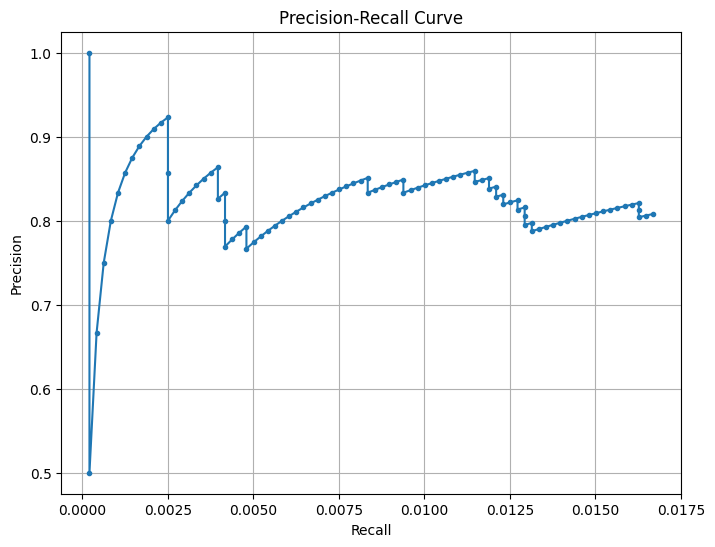

In [10]:
calculate_recall_precision_curve("Justin Bieber","As Long as You Love Me",df_mfcc_bow)

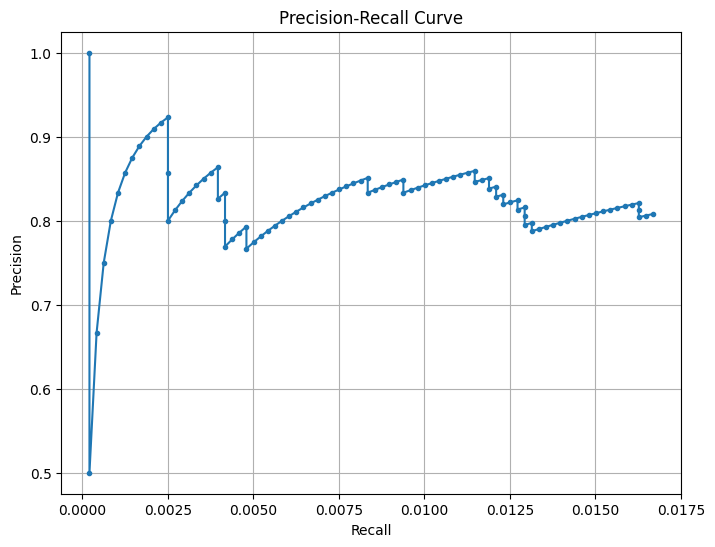

In [7]:
# Audio-based(cos-sim, MFCC BoW)
precision = []
recall = []
for number in range(1,100):
    result_list_MFCC = t2.song_retrieval(df_info, df_mfcc_bow, "As Long as You Love Me","Justin Bieber", number)
    precision.append(calculate_precision("Justin Bieber","As Long as You Love Me", result_list_MFCC, number))
    recall.append(calculate_recall("Justin Bieber","As Long as You Love Me", result_list_MFCC, number))

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.show()
#result_list_MFCC = t2.song_retrieval(df_info, df_mfcc_bow, "As Long as You Love Me","Justin Bieber", 10)
#calculate_precision("Justin Bieber","As Long as You Love Me", result_list_MFCC, 10)
#calculate_recall("Justin Bieber","As Long as You Love Me", result_list_MFCC, 10)

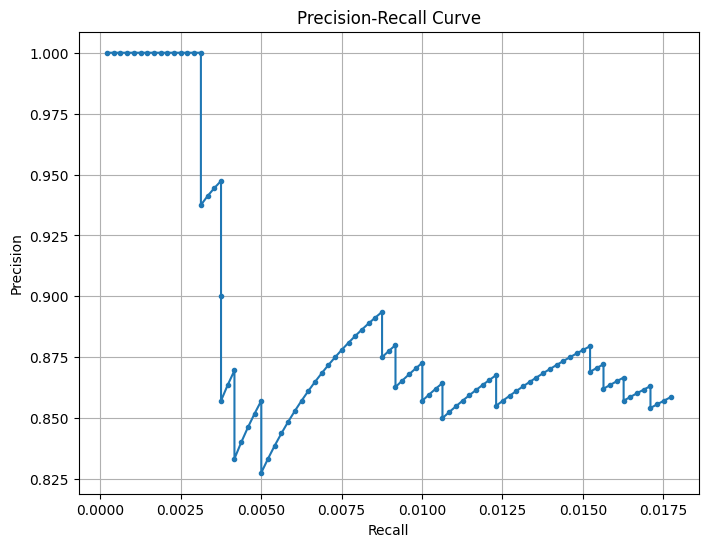

In [24]:
# Audio-based(cos-sim, DNN)
precision = []
recall = []
for number in range(1,100):
    result_list_DNN = t2.song_retrieval(df_info, df_musicnn, "As Long as You Love Me","Justin Bieber", number)
    precision.append(calculate_precision("Justin Bieber","As Long as You Love Me", result_list_DNN, number))
    recall.append(calculate_recall("Justin Bieber","As Long as You Love Me", result_list_DNN, number))

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.show()

#result_list_DNN = t2.song_retrieval(df_info, df_musicnn, "As Long as You Love Me","Justin Bieber", 10)
#calculate_precision("Justin Bieber","As Long as You Love Me", result_list_DNN, 10)
#calculate_recall("Justin Bieber","As Long as You Love Me", result_list_DNN, 10)

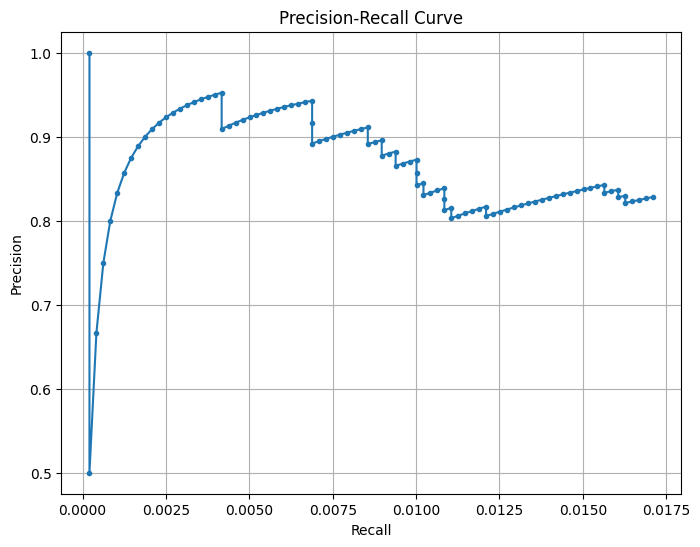

In [25]:
# Audio-based(cos-sim, ivec 256)
precision = []
recall = []
for number in range(1,100):
    result_list_ivec256 = t2.song_retrieval(df_info, df_ivec_256, "As Long as You Love Me","Justin Bieber", number)
    precision.append(calculate_precision("Justin Bieber","As Long as You Love Me", result_list_ivec256, number))
    recall.append(calculate_recall("Justin Bieber","As Long as You Love Me", result_list_ivec256, number))

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.show()

#result_list_ivec256 = t2.song_retrieval(df_info, df_ivec_256, "As Long as You Love Me","Justin Bieber", 10)
#calculate_precision("Justin Bieber","As Long as You Love Me", result_list_ivec256, 10)
#calculate_recall("Justin Bieber","As Long as You Love Me", result_list_ivec256, 10)

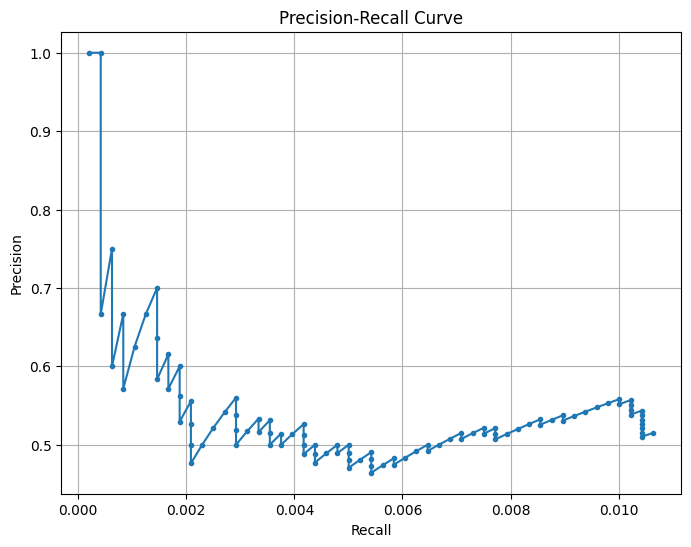

In [28]:
# Audio-based(cos-sim, BLF logfluc)
precision = []
recall = []
for number in range(1,100):
    result_list_BLF = t2.song_retrieval(df_info, df_logfluc, "As Long as You Love Me","Justin Bieber", number)
    precision.append(calculate_precision("Justin Bieber","As Long as You Love Me", result_list_BLF, number))
    recall.append(calculate_recall("Justin Bieber","As Long as You Love Me", result_list_BLF, number))

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.show()

#result_list_BLF = t2.song_retrieval(df_info, df_logfluc, "As Long as You Love Me","Justin Bieber", 10)
#calculate_precision("Justin Bieber","As Long as You Love Me", result_list_BLF, 10)
#calculate_recall("Justin Bieber","As Long as You Love Me", result_list_BLF, 10)